# 抽样和抽样分布

抽取样本的总体叫做抽样总体。抽样框是用于抽选样本的个体清单。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve() / 'data'
eai = pd.read_csv(DATA / 'EAI.csv')

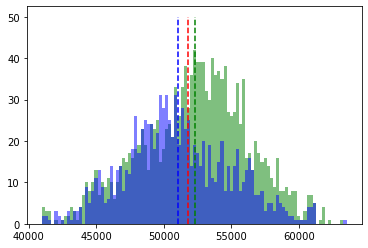

In [59]:
x1 = eai.loc[eai['Training Program'] == 'Yes', 'Annual Salary']
x2 = eai.loc[eai['Training Program'] == 'No', 'Annual Salary']

bins = np.linspace(eai['Annual Salary'].min(), eai['Annual Salary'].max(), 100)

meanIncome = eai['Annual Salary'].mean()
x1meanIncome = x1.mean()
x2meanIncome = x2.mean()

plt.plot([meanIncome, meanIncome], [0, 50], color='r', linestyle='--')
plt.plot([x1meanIncome, x1meanIncome], [0, 50], color='g', linestyle='--')
plt.plot([x2meanIncome, x2meanIncome], [0, 50], color='b', linestyle='--')

kwargs = dict(alpha=0.5, bins = bins)
plt.hist(x1, **kwargs, color='g', label='Yes')
plt.hist(x2, **kwargs, color='b', label='No')

plt.show()

# 抽样

## 从有限总体抽样

- 简单随机样本（有限总体）：从容量为 $N$ 的有限总体中抽取一个容量为 $n$ 的样本，如果容量为 $n$ 的每一个可能的样本都以相等的概率被抽出，则称该样本为简单随机样本
- 无放回抽样：一个个体一旦被选入样本，就从总体中剔除，不能再次被选入样本
- 有放回抽样：一个个体被选入样本后仍然放回总体中 先前被抽到的个体可能再次被选入样本 从而在样本中多次出现

从容量为 $N$ 的有限总体中抽取一个容量为 $n$ 的样本的选法有：

$$\binom {N}{n} = \frac {N!}{n!(N-n)!}$$


## 从无限总体中的抽样

从一个无限总体中抽取一个容量为 $n$ 的样本，满足下面的条件，即为随机样本（无限总体）：
1. 抽取的每个个体来自同一总体
2. 每个个体的抽取是独立的

In [60]:
sample = eai.sample(n=30, random_state=1)
sample.head()

,Manager,Annual Salary,Training Program
1406,1407,58237.4,Yes
297,298,53036.3,Yes
1276,1277,51922.8,No
2368,2369,48539.7,No
438,439,54034.7,Yes


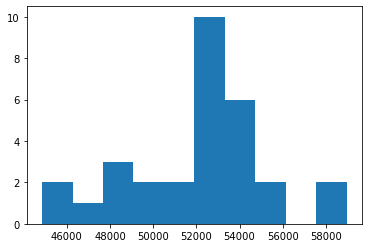

In [61]:
plt.hist(sample['Annual Salary'], bins = 10)
plt.show()

In [62]:
sample['Annual Salary'].count()

30

In [63]:
sample['Annual Salary'].mean()

52040.48333333332

In [64]:
sample['Annual Salary'].std()

3201.572833950831

In [65]:
sample.groupby(['Training Program']).count()

,Manager,Annual Salary
Training Program,,
No,11,11
Yes,19,19


In [66]:
sample.groupby(['Training Program'])['Annual Salary'].mean()

Training Program
No     51389.136364
Yes    52417.578947
Name: Annual Salary, dtype: float64

In [67]:
sample.groupby(['Training Program'])['Annual Salary'].std()

Training Program
No     2880.879343
Yes    3390.253426
Name: Annual Salary, dtype: float64

# 点估计
- 样本总计量：一种样本特征，如样本均值 $\bar x$、样本标准差 $s$、样本比率 $\bar p$
- 样本统计量的值用于估计相应总体参数
- 点估计量：提供总体参数点估计的样本统计量 如 $\bar x$、$s$ 或 $\bar p$
- 点估计值：点估计量的值，在一个特定的实例中用来作为总体参数的估计值
- 目标总体：进行统计推断的总体 目标总体应该是与相应的抽样总体尽可能多的相似

# 抽样分布简介

- 抽样分布：一个样本统计量所可能值构成的概率分布
- 在不同的简单随机样本中 $\bar x$的取值也有各种各样的可能的结果，称 $\bar x$ 的概率分布为 $\bar x$ 的抽样分布

## $\bar x$的数学期望
$$E(\bar{x}) = \mu$$
- $E(\bar{x})$ 为 $\bar{x}$ 的数学期望
- $\mu$ 为总体均值

## $\bar x$ 的标准差

有限总体：

$$\sigma_{\bar x} = \frac{\sigma}{\sqrt n} \times \sqrt{\frac {N-n}{N-1}}$$

其中：
- $\sigma_{\bar{x}}$ 是 $\bar{x}$ 的标准差
- $\sigma$ 是总体的标准差
- $n$ 样本容量
- $N$ 总体容量
- $\sqrt{\frac {N-n}{N-1}}$ 是有限总体修正系数

无限总体条件：
1. 总体是无限的
2. 总体是有限的，但样本容量不大于总体容量的 5% 即 $\displaystyle \frac{n}{N} \le 0.05$

无限总体标准差公式：
$$\sigma_{\bar x} = \frac{\sigma}{\sqrt n}$$

## $\bar x$ 的抽样分布

总体服从正态分布

总体不服从正态分布：借助中心极限定理确定 $\bar{x} 抽样分布的形状$

## 描述统计与推断统计

在介绍正态分布之前，我们先要理解描述统计和推断统计的区别：

### 描述统计

研究者从样本中收集数据，有时候只是想了解样本的特征。

例如，我想考察100个在校大学生的饮食习惯，就选择了100名学生，询问他们吃什么，然后将数据加以汇总。

从这些数据中能够得到的统计量包括样本中100名学生每天消耗的平均卡路里数、最常吃的食品、食品的种类等等。

所有这些统计量只是描述样本的特征，因此称为描述统计(descriptive statistics)。

描述统计一般只用来描述一个具体的样本。如果我们关心的只是描述一个具体样本，那么样本取值是否服从正态分布都无关紧要。

第一部分（除了最后的通过 $z$ 分数推测百分位之外）所涉及的内容，都是描述统计。

$z$ 分数推测服从正态分布数据的百分位，就是推断统计最典型的应用场景。

### 推断统计

然而，很多时候研究者想做的不只是描述一个样本。

有时候他们想知道样本中随机出现某种情形的准确概率。

例如，样本中的学生平均每日消耗2000卡路里，样本中包括一个每日消耗5 000卡路里学生的机会或概率有多大?

正态分布的三个性质在统计学中都很重要，因为有助于正确使用概率统计量( probability statistics)。

除此之外，研究者们通常想要根据从样本(sample)中收集的数据来推断总体( population)。

推断统计(inferential statistics) 用于决定样本中观测到的一些现象是否代表了从中抽样总体的一种实际现象。

例如，首先提出一个假设，认为总体中男女每日消耗卡路里数平均而言无差异。

这个无差异假设就是所谓的零假设(null hypothesis)。

现在假定我选取了一个男生样本和一个女生样本，比较他们各自平均每日消耗的卡路里数，发现男生的平均每日消耗量比女生多了200卡路里。给定无差异的零假设，随机发现如此大的样本间差异的概率是多大?

计算这些概率，就需要用到正态分布。统计学家利用正态分布的性质能够计算出准确的既率统计量。


## 均值的抽样分布

在正态分布之前，我们先看一下，我们日常会遇到的分布长什么样

下面我们使用 Lending Club 公司贷款申请人的年收入数据为例，查看数据分布情况是怎样的。

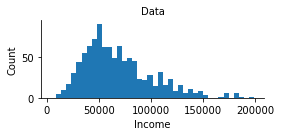

In [80]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze("columns")

g = sns.FacetGrid(sample_data, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[loans_income.min(), loans_income.max()], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

可以看到，原始数据的分布其实并没有什么“规律”可循，遇到数据的实际分布不服从正态分布的话，我们应该怎么办？

我们可以尝试对数据进行抽样，下面会对对数据进行抽样，返回的结果。

从一个总体中选取给定容量的随机样本，最终形成关于均值的一个抽样分布，在统计学上被称为**均值的抽样分布**。

In [77]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,income,type
30776,136750.0,Data
1494,90000.0,Data
48228,70000.0,Data
8931,36000.0,Data
2925,32000.0,Data


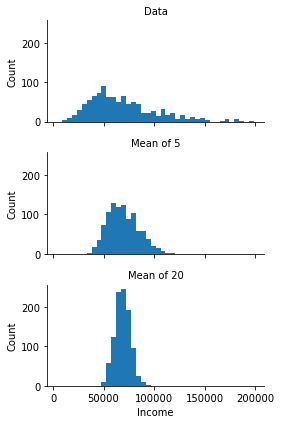

In [81]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[loans_income.min(), loans_income.max()], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

我们会发现：
- 随着抽样的样本个数增加，均值的抽样分布会越集中
- 即使样本取值分布不是正态分布，均值的抽样分布也服从正态分布

## 中心极限定理

上面的这个例子，其实就是著名的**中心极限定理**的具体应用。

- 即使样本取值分布不是正态分布，只要样本容量足够大 $(n>30)$，均值的抽样分布也服从正态分布
- 即使样本对象少于 30 个，只要样本数量超过 10 个，那么均值的抽样分布也近似正态。

如果你觉得这个演示不够生动活泼，可以看这里：[Central Limit Theorem](https://charts.upgrad.com/distributions/index.html#third)，手动设置以下参数：
- $\large \alpha$ = 1.20，$\large \beta$ = 5.00，Samples:15，Draws:100
- $\large \alpha$ = 5.00，$\large \beta$ = 1.20，Samples:15，Draws:100

可以发现，无论我们如何改变 $\large \alpha$ 和 $\large \beta$ ，均值的抽样分布都服从正态分布。

下面的代码来自《用Python动手学统计学》

In [ ]:
# 总体服从均值为 4 标准差为 0.8 的正态分布
population = stats.norm(loc = 4, scale = 0.8)
# 存放均值的容器
sample_mean_array = np.zeros(10000)
# 抽取 10 个数据并计算均值, 此操作重复 10,000 次
np.random.seed(1)
for i in range(0, 10000):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = np.mean(sample)
sample_mean_array

In [ ]:
# 样本均值的均值
np.mean(sample_mean_array)

In [7]:
# 样本均值的标准差
np.std(sample_mean_array, ddof = 1)

0.2513580850860402

<AxesSubplot:ylabel='Count'>

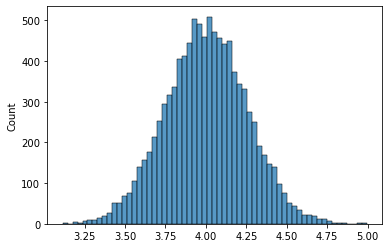

In [10]:
# 样本均值的样本分布
sns.histplot(sample_mean_array)

In [11]:
# 公差是 100 的样本容量, 范围是 10 到 100,010
size_array =  np.arange(
    start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [12]:
# 存放样本均值的容器
sample_mean_array_size = np.zeros(len(size_array))

In [14]:
# 改变样本容量的同时计算样本均值
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    sample_mean_array_size[i] = np.mean(sample)

Text(0, 0.5, 'sample mean')

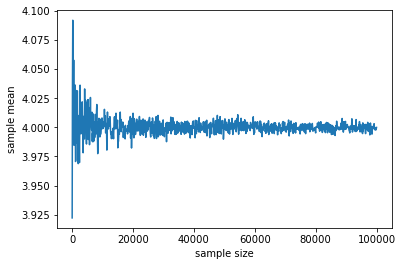

In [15]:
plt.plot(size_array, sample_mean_array_size)
plt.xlabel("sample size")
plt.ylabel("sample mean")

In [19]:
# 用于计算样本均值的函数
def calc_sample_mean(size, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = size)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)

In [20]:
# 验证函数功能
# 抽取 10 个数据并计算均值, 此操作重复 10,000 次, 再求这 10,000 个结果的均值
np.random.seed(1)
np.mean(calc_sample_mean(size = 10, n_trial = 10000))

4.004202422791747

### 不同样本容量所得的样本均值的分布

In [21]:
np.random.seed(1)
# 样本容量 10
size_10 = calc_sample_mean(size = 10, n_trial = 10000)
size_10_df = pd.DataFrame({
    "sample_mean":size_10,
    "size"       :np.tile("size 10", 10000)
})
# 样本容量 20
size_20 = calc_sample_mean(size = 20, n_trial = 10000)
size_20_df = pd.DataFrame({
    "sample_mean":size_20,
    "size"       :np.tile("size 20", 10000)
})
# 样本容量 30
size_30 = calc_sample_mean(size = 30, n_trial = 10000)
size_30_df = pd.DataFrame({
    "sample_mean":size_30,
    "size"       :np.tile("size 30", 10000)
})

# 拼接表格
sim_result = pd.concat(
    [size_10_df, size_20_df, size_30_df])

# 打印结果
print(sim_result.head())

   sample_mean     size
0     3.922287  size 10
1     3.864329  size 10
2     4.069530  size 10
3     3.857140  size 10
4     4.184654  size 10


<AxesSubplot:xlabel='size', ylabel='sample_mean'>

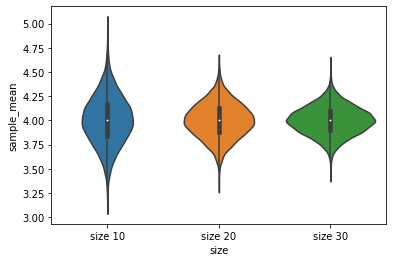

In [22]:
sns.violinplot(x = "size", y = "sample_mean", data = sim_result)

### 样本容量越大，其无偏方差越接近总体方差

In [23]:
# 公差为 100 的样本容量, 范围是 10 到 100,010
size_array =  np.arange(start = 10, stop = 100100, step = 100)
size_array

array([    10,    110,    210, ...,  99810,  99910, 100010])

In [24]:
# 存放无偏方差的容器
unbias_var_array_size = np.zeros(len(size_array))

In [25]:
# 在样本容量变化的同时反复计算样本的无偏方差
np.random.seed(1)
for i in range(0, len(size_array)):
    sample = population.rvs(size = size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof = 1)

Text(0, 0.5, 'unbias var')

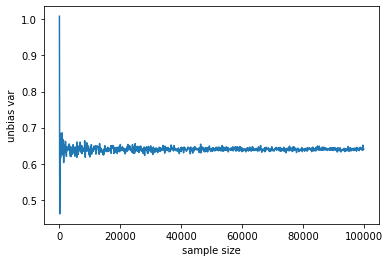

In [26]:
plt.plot(size_array, unbias_var_array_size)
plt.xlabel("sample size")
plt.ylabel("unbias var")

### 中心极限定理

<AxesSubplot:ylabel='Count'>

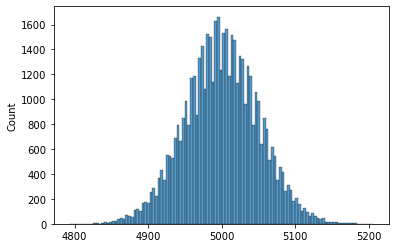

In [28]:
# 样本容量与试验次数
n_size  = 10000
n_trial = 50000
# 正面为 1, 背面为 0
coin = np.array([0,1])
# 出现正面的次数
count_coin = np.zeros(n_trial)
# 投 n_size 次硬币, 此实验进行 n_trial 次
np.random.seed(1)
for i in range(0, n_trial):
    count_coin[i] = np.sum(
        np.random.choice(coin, size = n_size, replace = True))
# 绘出直方图
sns.histplot(count_coin)

# $\bar p$ 的抽样分布

样本比率 $\bar p$ 是总体比率 $p$ 的点估计

样本比率的计算公式为

$$\bar p = \frac {x}{n}$$

$\bar p$ 的抽样分布：$\bar p$ 的抽样分布是样本比率 $\bar p$ 的所有可能值的概率分布

$\bar p$的数学期望是$\bar p$的所有可能值的均值，与总体比率$p$相等

$$E(\bar p) = p$$

$\bar p$的标准差

有限总体
$$\sigma_{\bar p} = \sqrt{\frac {N-n}{N-1}}\sqrt{\frac {p(1-p)}{n}}$$

无限总体
$$\sigma_{\bar p} = \sqrt{\frac {p(1-p)}{n}}$$

## $\bar p$ 的抽样分布的形态

由于已知在 $np \geq 5$ 和 $n(1-p) \geq 5$ 的情况下，正态分布是对二项分布的一个简便易行的近似。

当使用正态分布近似二项分布时，正态曲线中取 $\mu=np$ 和 $\sigma = \sqrt{np(1-p)}$

因此 $\bar p$ 的抽样分布可以用正态分布近似。

# 点估计的性质

$\theta$：感兴趣的总体参数，如总体均值、总体标准差、总体比率

$\hat{\theta}$：样本统计量或 $\theta$ 的点估计量，如样本均值、样本标准差和样本比率

## 无偏性

如果样本统计量的数学期望值等于所估计的总体参数，则称该样本统计量是相应总体参数的无偏估计量：

样本统计量 $\hat{\theta}$ 是总体参数 $\theta$ 的无偏估计量：

$$E(\hat{\theta}) = \theta$$

其中 $E(\hat{\theta})$ 代表样本统计量 $\hat{\theta}$ 的数学期望。

## 有效性

假定一个简单随机样本由 $n$ 个个体组成，给出了总体同一参数的两个不同的无偏点估计量。这时，我们倾向于采用标准误差较小的点估计量，因为它给出的估计值与总体参数更接近。

称有较小标准误差的点估计量比其他点估计量更相对有效（relative efficiency）。

## 一致性

一个好的点估计应该具备的第三条性质是一致性（consistency）。

粗略地讲，如果随着样本容量的增大，点估计量的值与总体参数越来越接近，则称该点估计量是一致的。换言之，大样本情形比小样本情形更易于得到一个好的点估计。

注意，对样本均值，我们可以证明 $\bar{x}$ 的标准误差 $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$。

由于 $\sigma_{\bar{x}}$ 与样本容量相关，样本容量越大 $\sigma_{\bar{x}}$ 值越小，

因此我们得出结论，大样本容量下所给出的点估计与总体均值更接近。从这个意义上，我们可以说样本均值是总体均值的一个一致估计量。

同理，我们也可以得出结论，样本比率 $\hat{p}$ 是总体比率 $p$ 的一个一致估计量。